<a href="https://colab.research.google.com/github/21IRV/IS170/blob/main/HW6_DelRio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PCA featuring treadmill consumer data
import pandas as pd 
df = pd.read_csv('/content/CardioGoodFitness.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [ ]:
# swapping out Gender and MartialStatus results from text to a scale of numbers
#python doesnt like to deal with converting strings to floats 
#import labelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Gender'])
df.drop('Gender', axis=1, inplace=True)
df['Gender']= label
le = LabelEncoder()
label1 = le.fit_transform(df['MaritalStatus'])
df.drop('MaritalStatus', axis=1, inplace=True)
df['MaritalStatus']= label1
df

,Product,Age,Education,Usage,Fitness,Income,Miles,Gender,MaritalStatus
0,TM195,18,14,3,4,29562,112,1,1
1,TM195,19,15,2,3,31836,75,1,1
2,TM195,19,14,4,3,30699,66,0,0
3,TM195,19,12,3,3,32973,85,1,1
4,TM195,20,13,4,2,35247,47,1,0
...,...,...,...,...,...,...,...,...,...
175,TM798,40,21,6,5,83416,200,1,1
176,TM798,42,18,5,4,89641,200,1,1
177,TM798,45,16,5,5,90886,160,1,1
178,TM798,47,18,4,5,104581,120,1,0


In [ ]:
#here we are loading variables X, Y with the values held in columns with iloc
#which refers to index postion 
import numpy as np
import matplotlib.pyplot as plt

X = df.iloc[:, 1:8].values
Y = df.iloc[:, 8]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the test set result using
# predict function under LogisticRegression
Y_pred = classifier.predict(X_test)

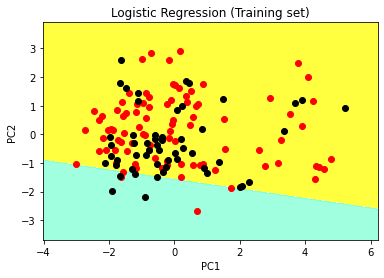

In [ ]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
	plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
				c = ListedColormap(('red', 'black', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
#plt.legend() # to show legend

# show scatter plot
plt.show()

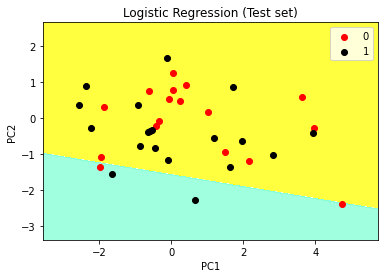

In [ ]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, Y_set = X_test, Y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
	plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
				c = ListedColormap(('red', 'black', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()

#the visualization of data can lead us to make decisons on which treadmill models our organization should prioritize to appeal to the general audience. while also taking potential consumers' incomes into account. 
#This data takes consumer's gender, income, martail status, their percieved fitness and activity level. 
